In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/Games Sales - Games (1).csv')

In [ ]:
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


In [ ]:
df.head(15)

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic
5,World of Warcraft,14.0,Warcraft,11/1/2004,MMORPG,Blizzard Entertainment,Blizzard Entertainment
6,Half-Life 2,12.0,Half-Life,11/1/2004,First-person shooter,Valve,Valve (digital)
7,The Witcher 3: Wild Hunt,12.0,The Witcher,5/1/2015,Action role-playing,CD Projekt Red,CD Projekt
8,StarCraft,11.0,StarCraft,3/1/1998,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
9,The Sims,11.0,The Sims,2/1/2000,Life simulation,Maxis,Electronic Arts


In [ ]:
df.shape

(177, 7)

In [ ]:
df.columns

Index(['Name', 'Sales', 'Series', 'Release', 'Genre', 'Developer',
       'Publisher'],
      dtype='object')

In [ ]:
df.dtypes

Name          object
Sales        float64
Series        object
Release       object
Genre         object
Developer     object
Publisher     object
dtype: object

# **DATA** **PREPARATION**

In [ ]:
# change data type
df['Release'] = pd.to_datetime(df['Release'])

In [ ]:
#recheck it
df.dtypes

Name                 object
Sales               float64
Series               object
Release      datetime64[ns]
Genre                object
Developer            object
Publisher            object
dtype: object

In [ ]:
#checking if there's any duplicate
df.loc[df.duplicated()]

,Name,Sales,Series,Release,Genre,Developer,Publisher
175,StarCraft II: Heart of the Swarm,1.0,StarCraft,2013-03-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
176,StarCraft II: Legacy of the Void,1.0,StarCraft,2015-11-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment


In [ ]:
#check the duplicate in Name columns
df.query('Name == "StarCraft II: Heart of the Swarm" ')

,Name,Sales,Series,Release,Genre,Developer,Publisher
157,StarCraft II: Heart of the Swarm,1.0,StarCraft,2013-03-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
175,StarCraft II: Heart of the Swarm,1.0,StarCraft,2013-03-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment


In [ ]:
# drop the duplicate
df = df.drop(175)

In [ ]:
df.shape

(176, 7)

# **DATA VISUALIZATION**

Text(0.5, 0, 'Count')

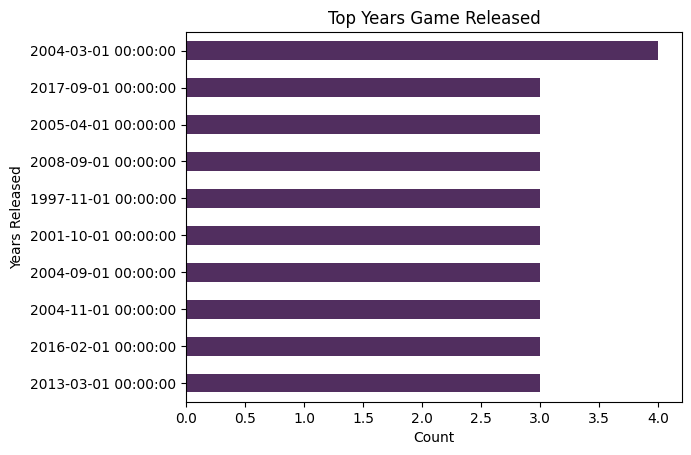

In [ ]:
ax = df['Release'].value_counts() \
  .head(10).sort_values(ascending=True) \
  .plot(kind='barh', title='Top Years Game Released', color='#512E5F')

ax.set_ylabel('Years Released')
ax.set_xlabel('Count')

Text(0.5, 0, 'Count')

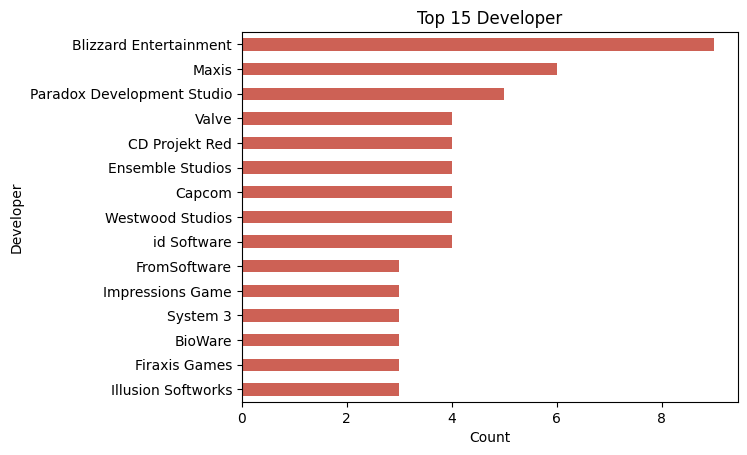

In [ ]:
ax = df['Developer'].value_counts() \
  .head(15).sort_values(ascending=True) \
  .plot(kind='barh', title='Top 15 Developer', color='#CD6155')

ax.set_ylabel('Developer')
ax.set_xlabel('Count')


Text(0.5, 0, 'Count')

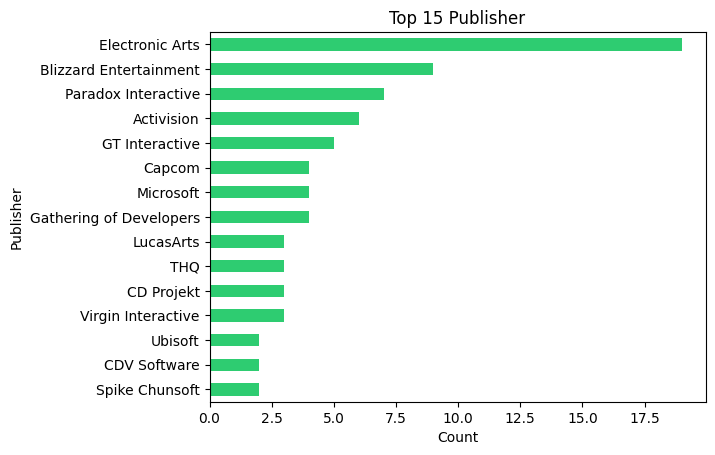

In [ ]:
ax = df['Publisher'].value_counts() \
  .head(15).sort_values(ascending=True) \
  .plot(kind='barh', title='Top 15 Publisher', color='#2ECC71')

ax.set_ylabel('Publisher')
ax.set_xlabel('Count')

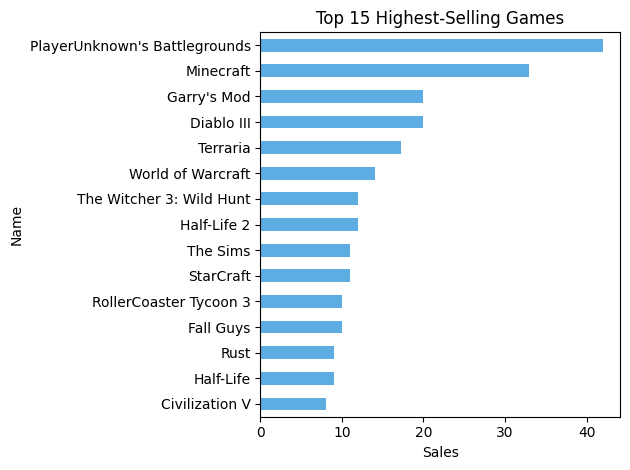

In [ ]:
sales_by_name = df.groupby('Name')['Sales'].sum()

top = sales_by_name.nlargest(15)

ax = top.sort_values(ascending=True).plot(kind='barh', color='#5DADE2')
ax.set_xlabel('Sales')
ax.set_ylabel('Name')
ax.set_title('Top 15 Highest-Selling Games')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Genre')

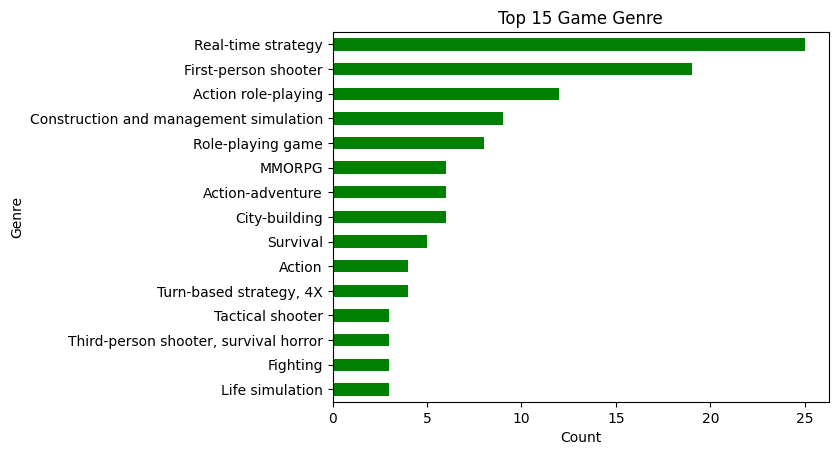

In [ ]:
ax = df['Genre'].value_counts() \
  .head(15).sort_values(ascending=True) \
  .plot(kind='barh', title='Top 15 Game Genre', color='green')

ax.set_xlabel('Count')
ax.set_ylabel('Genre')

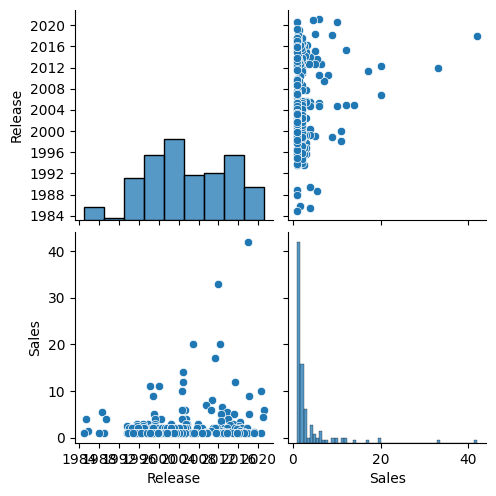

In [ ]:
scatt = sns.pairplot(df, vars=['Release', 'Sales'])
plt.show()